In [101]:
#biblioteca de manipulação 
import pandas as pd
import numpy as np
#visualização de dados
#importando bibliotecas
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv("trial.csv", sep=',')
df

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,2,0.40,2,0.89,5.0,2,0.00,2,2,0,2,0,2,2.0,0
772,55.57,16,0.47,2,0.37,2,0.84,5.0,2,0.00,2,2,0,2,0,2,2.0,0
773,55.57,14,0.24,2,0.04,2,0.28,5.0,2,0.00,2,2,0,2,0,2,2.0,0
774,55.57,18,0.20,2,0.00,2,0.20,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [67]:
#verificando o formado do dataset
df.shape

(776, 18)

In [68]:
#pega apenas o topo ou pode informar o inf também
df.head().T

# O Ponto T server para transpor no lugar de linha para inhas 

,0,1,2,3,4
Sector_score,3.89,3.89,3.89,3.89,3.89
LOCATION_ID,23,6,6,6,6
PARA_A,4.18,0.0,0.51,0.0,0.0
SCORE_A,6,2,2,2,2
PARA_B,2.5,4.83,0.23,10.8,0.08
SCORE_B,2,2,2,6,2
TOTAL,6.68,4.83,0.74,10.8,0.08
numbers,5.0,5.0,5.0,6.0,5.0
Marks,2,2,2,6,2
Money_Value,3.38,0.94,0.0,11.75,0.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    775 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

In [70]:
#Verifica a quantidade de ocorrência por valor existente
#df['LOCATION_ID'].value_counts().sort_index(inplace=True)
df['LOCATION_ID'].value_counts().sort_index()

LOCATION_ID
1          11
11         26
12         47
13         35
14         20
15         35
16         52
17          1
18         16
19         68
2          41
20          5
21          8
22         24
23          1
24          1
25          6
27          8
28          8
29         21
3           3
30          4
31         12
32         29
33          1
34          1
35          2
36          4
37         10
38          4
39          9
4          37
40          3
41          1
42          1
43          7
44          1
5          44
6          33
7           4
8          76
9          53
LOHARU      1
NUH         1
SAFIDON     1
Name: count, dtype: int64

In [102]:
#Transformando dados em numericos
df['LOCATION_ID'] = pd.to_numeric(df['LOCATION_ID'], errors='coerce')


Sector_score     0
LOCATION_ID      3
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [104]:
#verificar atributos com valores ausentes
df.isnull()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
772,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
773,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
774,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [103]:
#verificar atributos com valores ausentes
df.isnull().sum(axis=0)

Sector_score     0
LOCATION_ID      3
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [105]:
#substituir valores ausentes de 'Location ID'Amostragem.ipynb
# substituir valores ausentes de 'LOCATION_ID'
df['LOCATION_ID'] = df['LOCATION_ID'].fillna(-1)

# verificar a substituição
print(df["LOCATION_ID"].iloc[351])
print(df["LOCATION_ID"].iloc[355])
print(df["LOCATION_ID"].iloc[367])


-1.0
-1.0
-1.0


In [112]:
df.groupby('LOCATION_ID')['Score'].mean().sort_values().head(10)

LOCATION_ID
-1.0     2.000000
 17.0    2.000000
 43.0    2.114286
 6.0     2.296970
 5.0     2.318182
 28.0    2.375000
 23.0    2.400000
 4.0     2.421622
 13.0    2.525714
 9.0     2.532075
Name: Score, dtype: float64

In [113]:
# substituir valores ausentes de 'Money_Value'
df['Money_Value'] = df['Money_Value'].where(pd.notna(df['Money_Value']), df['Money_Value'].mean())

In [114]:
# verificar a substituição
print(df['Money_Value'].iloc[642])
print(df['Money_Value'].iloc[642] == df['Money_Value'].mean())

14.137630967741934
True


In [74]:
#agrupando os dados, ajustando, ordenando e cortando

#df.groupby('LOCATION_ID')['Score'].mean().sort_values(ascending=False).head(10)

In [80]:
# Verificando o Balanceamento dos dados 

df['Risk'].value_counts(normalize=True)


Risk
1    0.626289
0    0.373711
Name: proportion, dtype: float64

<Axes: xlabel='Risk'>

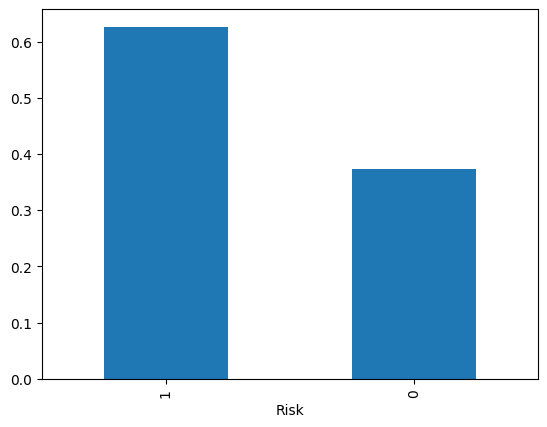

In [81]:
#plotando Gráficos
df['Risk'].value_counts(normalize=True).plot.bar()

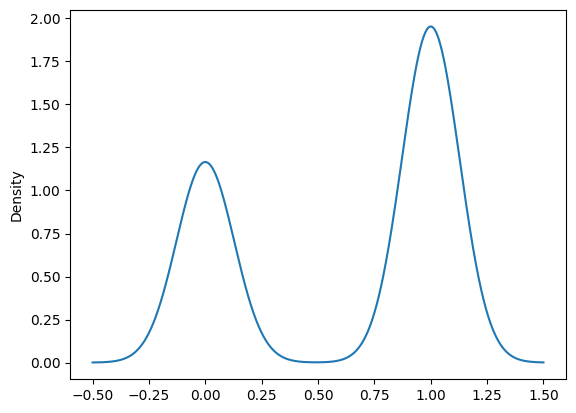

In [115]:
df["Risk"].plot.density();

In [82]:
df.describe()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,773.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,14.856404,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,9.891317,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,8.000000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,13.000000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,19.000000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,44.000000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


array([[<Axes: title={'center': 'Sector_score'}>,
        <Axes: title={'center': 'LOCATION_ID'}>,
        <Axes: title={'center': 'PARA_A'}>,
        <Axes: title={'center': 'SCORE_A'}>],
       [<Axes: title={'center': 'PARA_B'}>,
        <Axes: title={'center': 'SCORE_B'}>,
        <Axes: title={'center': 'TOTAL'}>,
        <Axes: title={'center': 'numbers'}>],
       [<Axes: title={'center': 'Marks'}>,
        <Axes: title={'center': 'Money_Value'}>,
        <Axes: title={'center': 'MONEY_Marks'}>,
        <Axes: title={'center': 'District'}>],
       [<Axes: title={'center': 'Loss'}>,
        <Axes: title={'center': 'LOSS_SCORE'}>,
        <Axes: title={'center': 'History'}>,
        <Axes: title={'center': 'History_score'}>],
       [<Axes: title={'center': 'Score'}>,
        <Axes: title={'center': 'Risk'}>, <Axes: >, <Axes: >]],
      dtype=object)

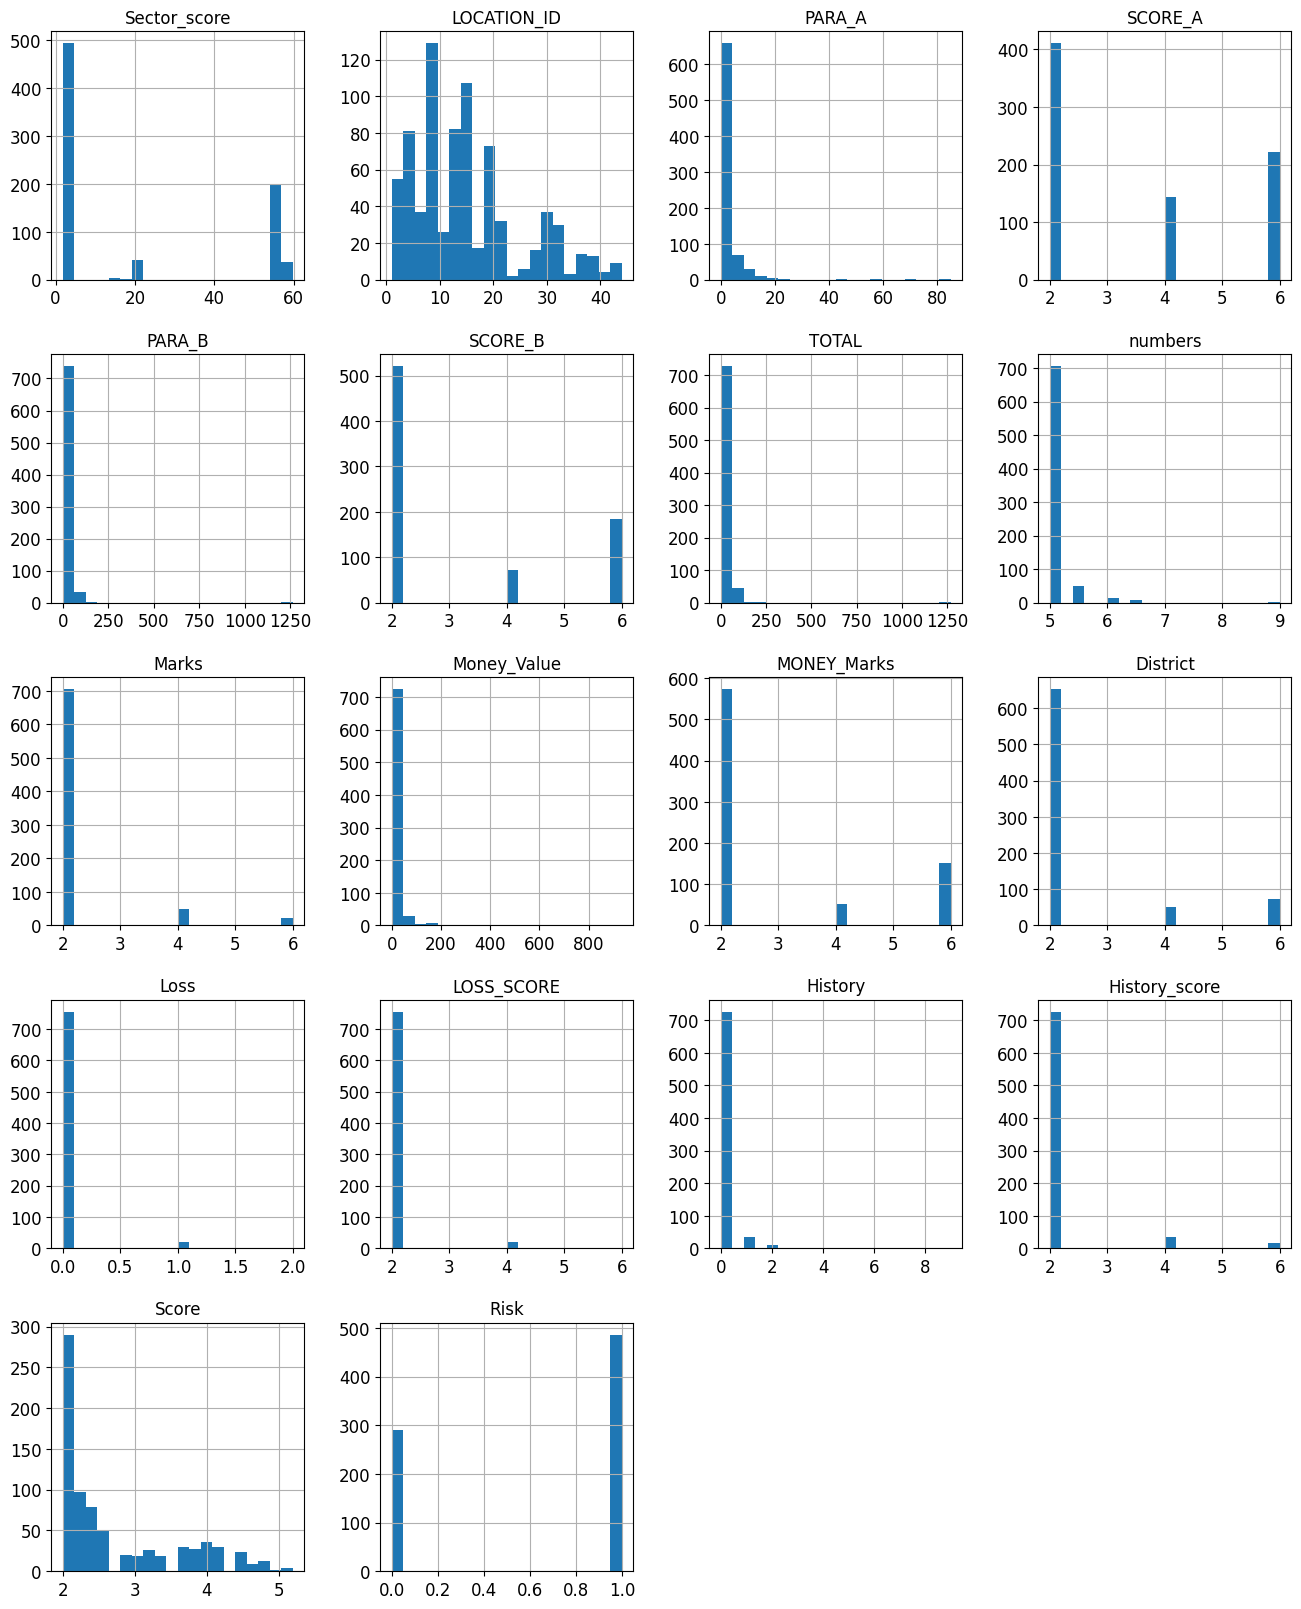

In [83]:
#visualizando distribuição das variaveis

df.hist(figsize=(16,20), bins=20, xlabelsize=12, ylabelsize=12)

<Axes: >

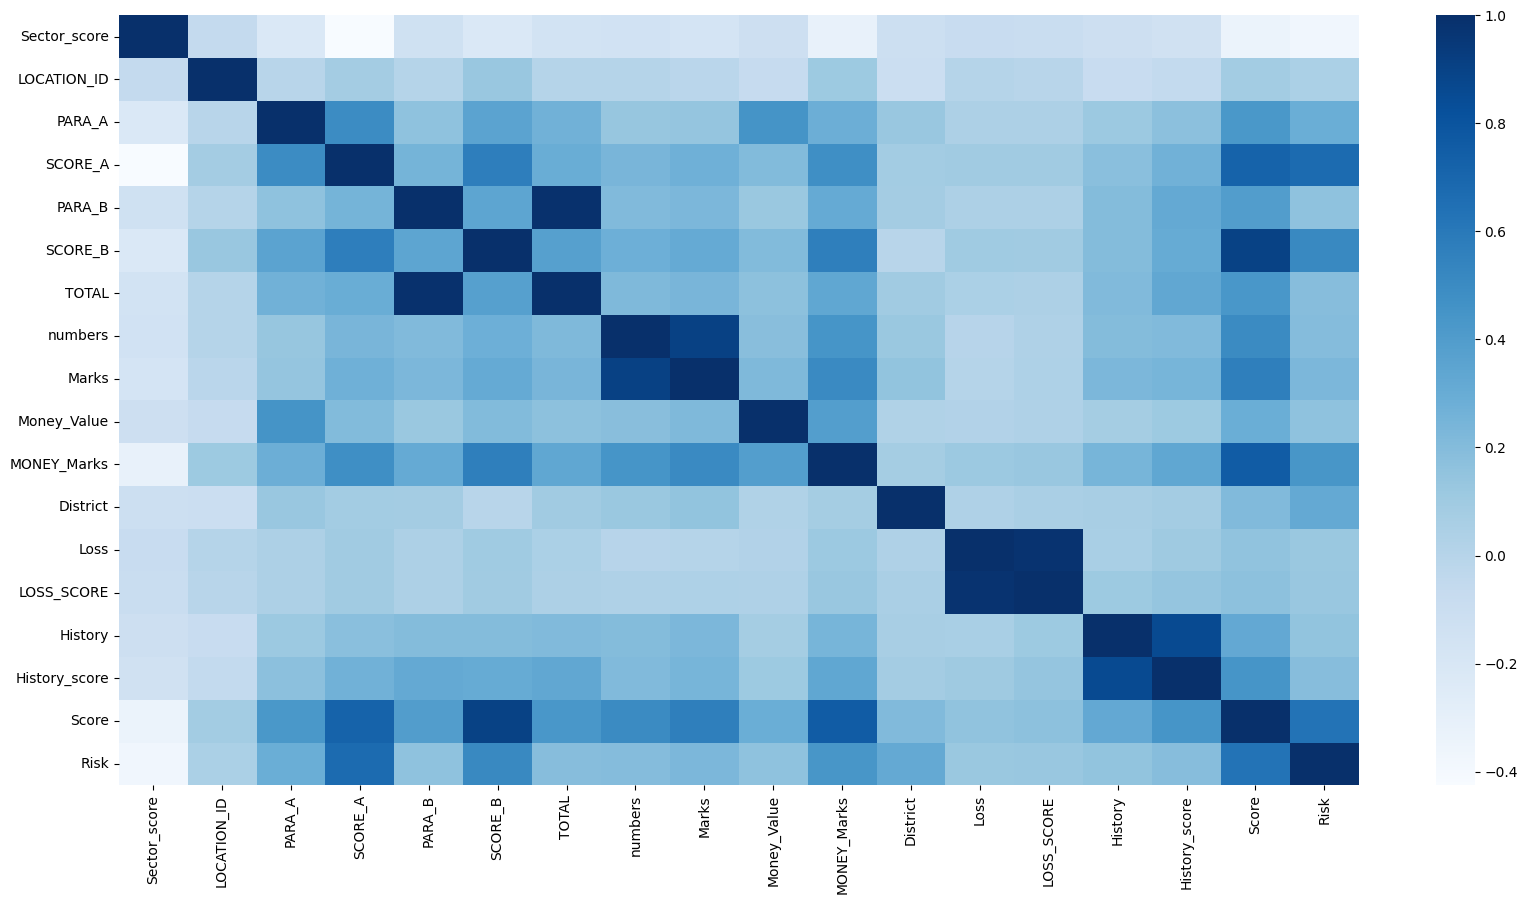

In [90]:
# Visualizar Correlação entre as variáveis 

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='Blues')

In [117]:
# Verificar a correlação entre as variaveis e a variavel alvo

df.corr()['Risk'][:-1].sort_values(ascending=False)

SCORE_A          0.671863
Score            0.632268
SCORE_B          0.515045
MONEY_Marks      0.440226
District         0.317795
PARA_A           0.292425
Marks            0.228098
numbers          0.197750
TOTAL            0.190793
History_score    0.190466
PARA_B           0.162807
Money_Value      0.160543
History          0.151937
LOSS_SCORE       0.127472
Loss             0.124322
LOCATION_ID      0.056306
Sector_score    -0.374588
Name: Risk, dtype: float64

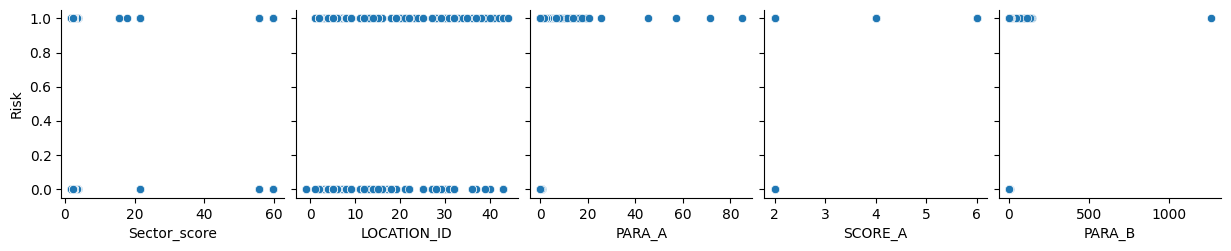

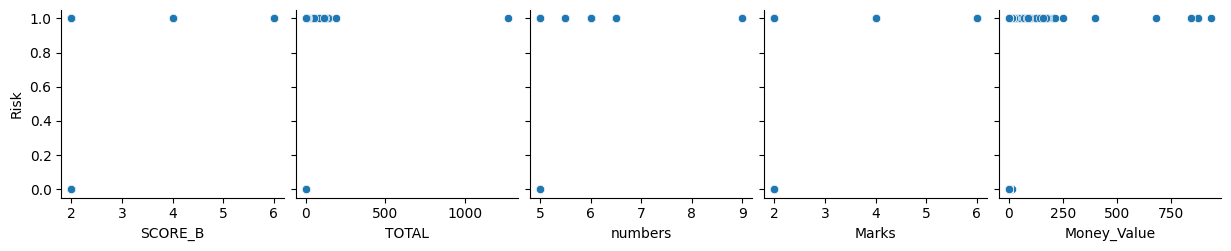

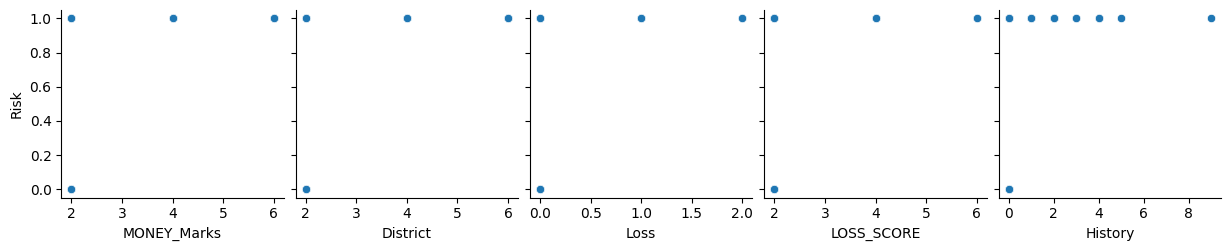

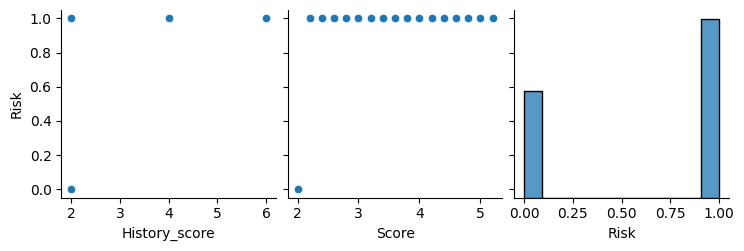

In [118]:
# visualizar a correlação entre as variaveis e a variável alvo

for i in range(0, len(df.columns),5):
    sns.pairplot(data=df, x_vars=df.columns[i:i+5], y_vars=['Risk'])

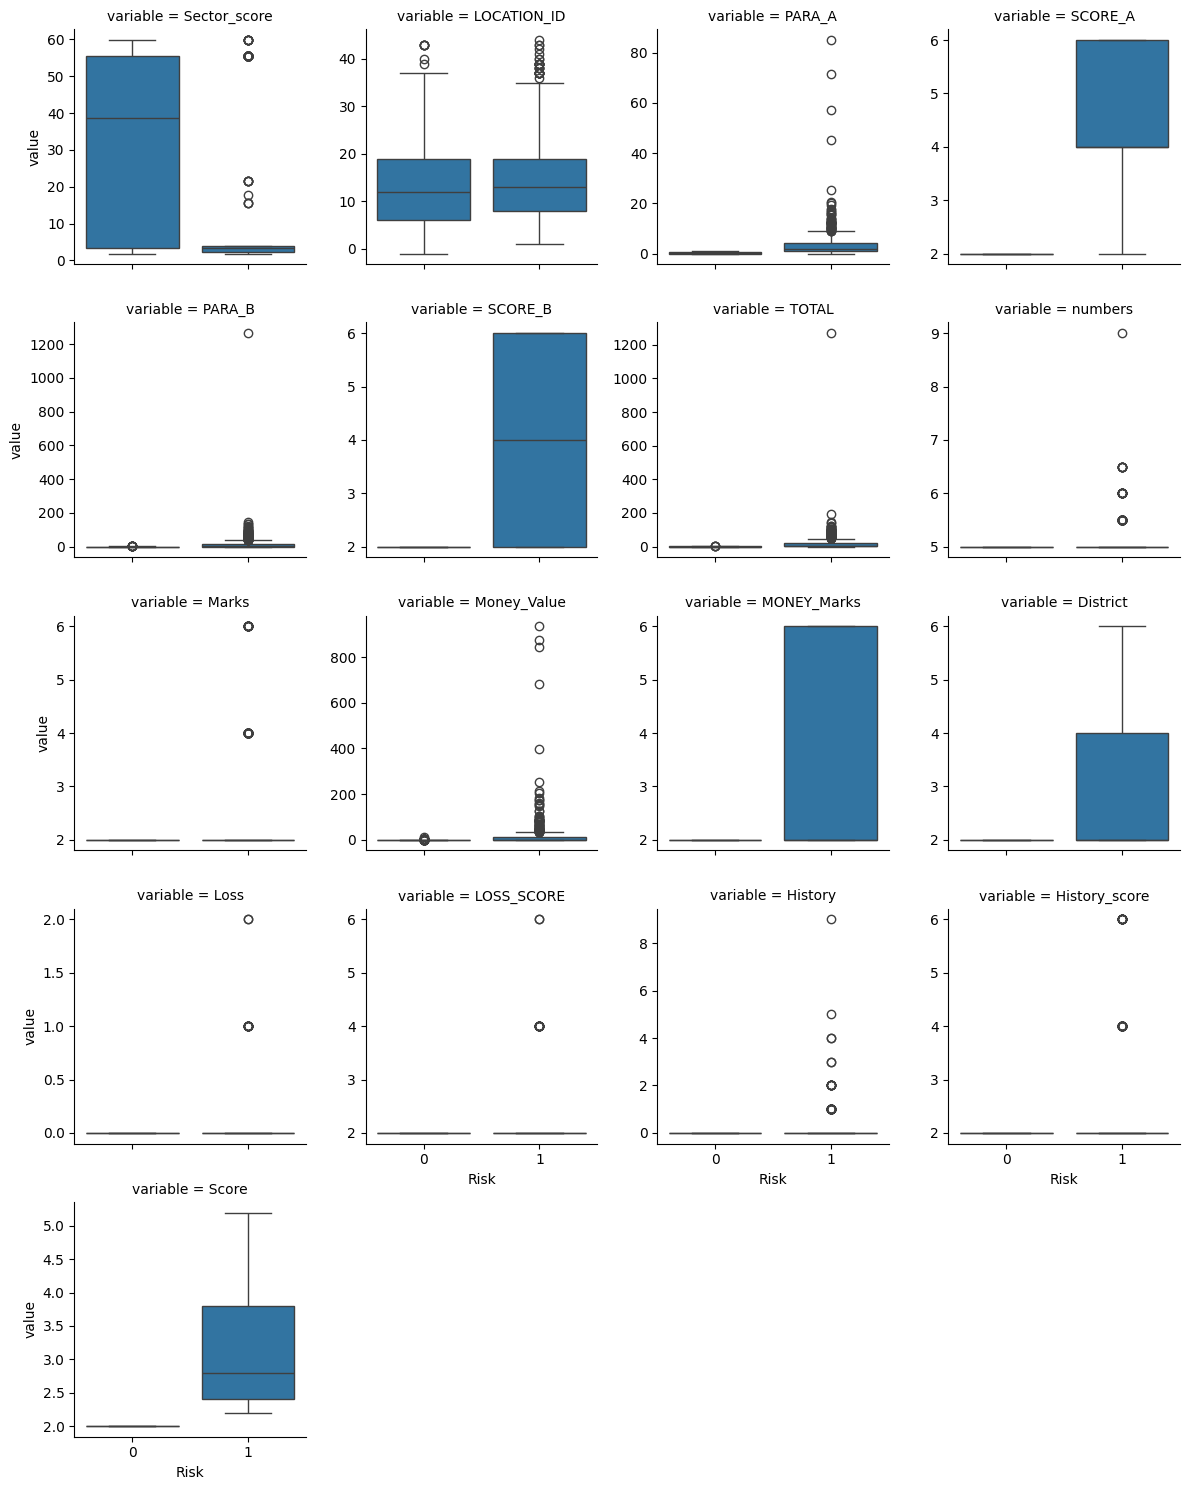

In [120]:
# Visualizar a distribuição dos dados para cada variável

df_melt = df.melt(id_vars=["Risk"])
grid = sns.axisgrid.FacetGrid(df_melt[df_melt.variable.isin(df.columns)], 
                              col='variable', col_wrap=4, sharey=False)
grid.map(sns.boxplot, "Risk","value", order=None);

In [100]:
#média, median, moda, variancia e desvio padrão

df['SCORE_B'].mean()
print('Media do Score_B é: {}')
df['SCORE_B'].median()
print('Media do Score_B é: {}')
df['SCORE_B'].mode()
print('Media do Score_B é: {}')
df['SCORE_B'].var()
print('Media do Score_B é: {}')
df['SCORE_B'].std()
print('Media do Score_B é: {}')

#quartis
df['SCORE_B'].quantile(0.25)
print('Media do Score_B é: {}')
df['SCORE_B'].quantile(0.50)
print('Media do Score_B é: {}')
df['SCORE_B'].quantile(0.75)
print('Media do Score_B é: {}')

4.0